<Figure size 2000x2000 with 0 Axes>

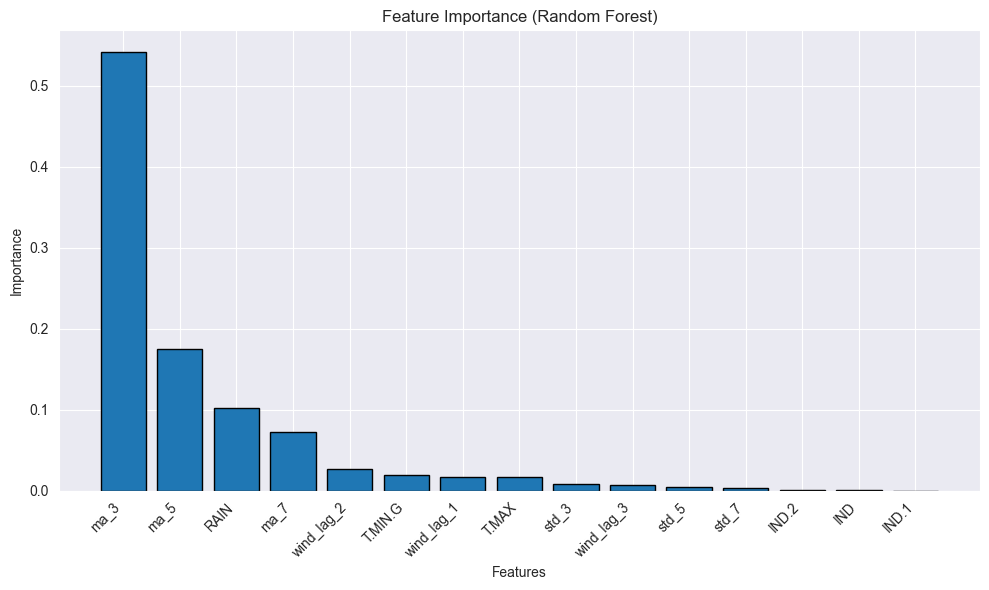

3.280308815235889
3.2352282602125007


(array([ 36.,  43.,  45.,  52.,  51., 106., 163., 109., 118., 101.,  92.,
         85.,  67.,  72.,  47.,  43.,  38.,  39.,  36.,   9.]),
 array([ 4.66250845,  5.21295746,  5.76340647,  6.31385548,  6.86430449,
         7.41475351,  7.96520252,  8.51565153,  9.06610054,  9.61654955,
        10.16699857, 10.71744758, 11.26789659, 11.8183456 , 12.36879461,
        12.91924363, 13.46969264, 14.02014165, 14.57059066, 15.12103967,
        15.67148869]),
 <BarContainer object of 20 artists>)

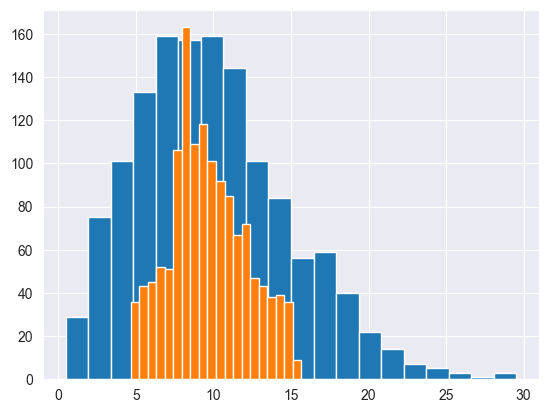

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
df = pd.read_csv('wind_dataset.csv', index_col='DATE', parse_dates=True)

df['wind_lag_1'] = df['WIND'].shift(1)
df['wind_lag_2'] = df['WIND'].shift(2)
df['wind_lag_3'] = df['WIND'].shift(3)

df['ma_3'] = df['WIND'].rolling(3).mean()
df['ma_5'] = df['WIND'].rolling(5).mean()
df['ma_7'] = df['WIND'].rolling(7).mean()

df['std_3'] = df['WIND'].rolling(3).std()
df['std_5'] = df['WIND'].rolling(5).std()
df['std_7'] = df['WIND'].rolling(7).std()

df['wind_difference'] = df['WIND'].diff()
df['wind_shifted'] = df['WIND'].shift(-1)
df.dropna(inplace=True)
df
df.columns

scaler = StandardScaler()
X = df[['IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN.G', 'wind_lag_1', 'wind_lag_2', 'wind_lag_3','ma_3', 'ma_5', 'ma_7','std_3', 'std_5', 'std_7',]]
# X = df[[ 'RAIN',  'T.MAX', 'T.MIN.G', 'wind_lag_1', 'wind_lag_2', 'wind_lag_3',]]

X_scaled = scaler.fit_transform(X)
y = df['wind_shifted']
plt.figure(figsize=(20, 20))
##Normal X
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.76)
# X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]

##Scaled X
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.76)
X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]

model = RandomForestRegressor(n_estimators=60, max_depth=4, max_features=9)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X.columns  # assuming X is a DataFrame

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center', edgecolor='k')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
test_pred
print(mean_absolute_error(y_test, test_pred))
print(mean_absolute_error(y_train, train_pred))
df['WIND'].min()
df['WIND'].max()
plt.hist(y_test, bins=20)
plt.hist(test_pred, bins=20)